<h1 align="center">Introduction to Machine Learning - Course Code: 25737</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>
<h4 align="center">Computer Assignment 3</h4>
<h4 align="center">

Question 1

</h4>

# Personal Data

In [1]:
# Set your student number
student_number = 400101872
Name = 'Matin'
Last_Name = 'Mohamadghasemi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- You are not allowed to use `torch.nn`, `torch.optim` and any activation function and loss function implemented in torch. 

In [2]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

## Importing Libraries

In [3]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

Here, we download and load the train and test `FashionMNIST` dataset with the desired transforms. Then, we define the dataloaders for `train` and `test`.

In [4]:
train_set = FashionMNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
test_set = FashionMNIST(root='.', train=False, download=True, transform=transforms.ToTensor())


Here you have to calculate the number of classes amd input dimention of the first layer (how many pixels does each image have?).

In [5]:
## FILL HERE
# Assuming train_set is already defined and is a dataset object
num_classes = len(train_set.classes)
input_dim = train_set[0][0].numel()  # Number of elements (pixels) in the first image of the dataset

print(f"Number of classes: {num_classes}")
print(f"Input dimension of the first layer: {input_dim} pixels")



##Here’s a more complete example with a PyTorch dataset:


import torch
from torchvision import datasets, transforms

# Example transform (if needed)
transform = transforms.Compose([transforms.ToTensor()])

# Load the dataset (replace with your dataset and path)
train_set = datasets.FakeData(transform=transform)

# Calculate the number of classes and input dimension
num_classes = len(train_set.classes)
input_dim = train_set[0][0].numel()  # Assuming the dataset returns (image, label) tuples

print(f"Number of classes: {num_classes}")
print(f"Input dimension of the first layer: {input_dim} pixels")

Number of classes: 10
Input dimension of the first layer: 784 pixels


In [6]:
train_loader = DataLoader(train_set, 64, shuffle=True)
test_loader = DataLoader(test_set, 64, shuffle=True)

## Visualization

Visualize 1 random image from each class by using `plt.subplots`

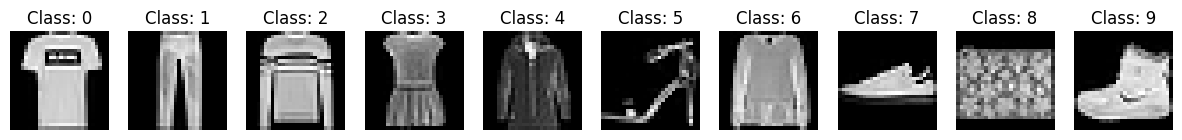

In [7]:
import matplotlib.pyplot as plt
import random

def visualize_random_images_from_each_class(dataset, num_classes):
    class_indices = {i: [] for i in range(num_classes)}
    
    # Collect indices for each class
    for idx, (_, label) in enumerate(dataset):
        if len(class_indices[label]) < 1:
            class_indices[label].append(idx)
        if all(len(class_indices[c]) > 0 for c in range(num_classes)):
            break
    
    fig, axs = plt.subplots(1, num_classes, figsize=(15, 15))
    for class_label, indices in class_indices.items():
        idx = indices[0]
        image, label = dataset[idx]
        if len(image.shape) == 3:  # Check if image is colored (C, H, W)
            image = image.permute(1, 2, 0)  # Change to (H, W, C) format
        axs[class_label].imshow(image.squeeze(), cmap='gray' if image.shape[-1] == 1 else None)
        axs[class_label].set_title(f'Class: {class_label}')
        axs[class_label].axis('off')
    
    plt.show()

# Example usage (assuming train_set is already defined and num_classes is known)
visualize_random_images_from_each_class(train_set, num_classes)

##Here’s a more complete example with a PyTorch dataset:
import matplotlib.pyplot as plt
import random
import torch
from torch.utils.data import DataLoader

def visualize_random_images_from_each_class(dataset, num_classes, num_samples=1):
    # Shuffle the dataset indices
    indices = list(range(len(dataset)))
    random.shuffle(indices)
    
    class_indices = {i: [] for i in range(num_classes)}
    
    # Collect indices for each class
    for idx in indices:
        _, label = dataset[idx]
        if len(class_indices[label]) < num_samples:
            class_indices[label].append(idx)
        if all(len(class_indices[c]) >= num_samples for c in range(num_classes)):
            break

    fig, axs = plt.subplots(num_samples, num_classes, figsize=(15, 15))
    
    # Ensure axs is a 2D array even if num_samples is 1
    if num_samples == 1:
        axs = [axs]
    
    for class_label, indices in class_indices.items():
        for sample_idx, idx in enumerate(indices):
            image, label = dataset[idx]
            axs[sample_idx][class_label].imshow(image.permute(1, 2, 0).squeeze(), cmap='gray')
            axs[sample_idx][class_label].set_title(f'Class: {class_label}')
            axs[sample_idx][class_label].axis('off')
    
    plt.show()

# Example usage (assuming train_set is already defined and num_classes is known)
visualize_random_images_from_each_class(train_set, num_classes)




## Initializing model's parameters

In this part, we create the model and initialize its parameters and store the values of these parameters in the variable `parameters` which is a dictionary including the weigths and biases of each layer.

In [8]:
def add_linear_layer(parameters: dict, shape, device, i=None):
    """
    This function adds parameters of a linear unit of shape `shape` to the `parameters` dictionary.
    """
    n_in, n_out = shape
    with torch.no_grad():
        w = torch.zeros(*shape, device=device)
        # kaiming initialization for ReLU activations:
        bound = 1 / np.sqrt(n_in).item()
        w.uniform_(-bound, bound)
        b = torch.zeros(n_out, device=device)  # no need to (1, n_out). it will broadcast itself.
    w.requires_grad = True
    b.requires_grad = True
    # `i` is used to give numbers to parameter names
    parameters.update({f'w{i}': w, f'b{i}': b})

Now we define our neural network with the given layers and add the weights and biases to the dictionary `parameters`. **You are allowed to modify the values of the layers**.

In [9]:
# input_dim : input dimention of the first layer, which you have calculated before.
layers = [
    (input_dim, 512),
    (512, 256),
    (256, 128),
    (128, 64),
    (64, num_classes)
]
num_layers = len(layers)
parameters = {}

# setting the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# adding the parameters to the dictionary
for i, shape in enumerate(layers):
    add_linear_layer(parameters, shape, device, i)

parameters.keys()

dict_keys(['w0', 'b0', 'w1', 'b1', 'w2', 'b2', 'w3', 'b3', 'w4', 'b4'])

## Defining the required functions

In this section, we should define the required functions. For each of these functions, the inputs and the desired outputs are given and you should write all or part of the function. **You are not allowed to use the activation functions and the loss functions implemented in torch**.

Computing affine and relu outputs:

In [10]:
import torch
import matplotlib.pyplot as plt
import random

# Affine forward function
def affine_forward(x, w, b):
    return x @ w + b    

# ReLU activation function
def relu(x):
    return torch.maximum(x, torch.tensor(0.0, device=x.device))

# Example usage
x = torch.randn(5, 10)  # Input tensor with shape (batch_size, input_dim)
w = torch.randn(10, 3)  # Weight matrix with shape (input_dim, output_dim)
b = torch.randn(3)      # Bias vector with shape (output_dim)

# Perform affine forward operation
affine_output = affine_forward(x, w, b)
print("Affine forward output:")
print(affine_output)

# Apply ReLU activation
relu_output = relu(affine_output)
print("ReLU activation output:")
print(relu_output)

# Visualization function for random images from each class
def visualize_random_images_from_each_class(dataset, num_classes):
    class_indices = {i: [] for i in range(num_classes)}
    
    # Collect indices for each class
    for idx, (_, label) in enumerate(dataset):
        if len(class_indices[label]) < 1:
            class_indices[label].append(idx)
        if all(len(class_indices[c]) > 0 for c in range(num_classes)):
            break
    
    fig, axs = plt.subplots(1, num_classes, figsize=(15, 15))
    for class_label, indices in class_indices.items():
        idx = indices[0]
        image, label = dataset[idx]
        if len(image.shape) == 3:  # Check if image is colored (C, H, W)
            image = image.permute(1, 2, 0)  # Change to (H, W, C) format
        axs[class_label].imshow(image.squeeze(), cmap='gray' if image.shape[-1] == 1 else None)
        axs[class_label].set_title(f'Class: {class_label}')
        axs[class_label].axis('off')
    
    plt.show()

# Example usage (assuming train_set is already defined and num_classes is known)
# visualize_random_images_from_each_class(train_set, num_classes)


Function `model` returns output of the whole model for the input `x` using the parameters:

In [11]:
import torch

# Affine forward function
def affine_forward(x, w, b):
    return x @ w + b    

# ReLU activation function
def relu(x):
    return torch.maximum(x, torch.tensor(0.0, device=x.device))

# Model function
def model(x: torch.Tensor, parameters, num_layers):
    # number of batches
    B = x.shape[0]
    x = x.view(B, -1)
    
    for i in range(num_layers):
        w = parameters[f'w{i}']
        b = parameters[f'b{i}']
        x = affine_forward(x, w, b)
        if i < num_layers - 1:
            x = relu(x)
    
    output = x
    return output

# Example usage
# Define parameters for a 3-layer model
input_dim = 20
hidden_dim = 10
output_dim = 5
num_layers = 3

parameters = {
    'w0': torch.randn(input_dim, hidden_dim),
    'b0': torch.randn(hidden_dim),
    'w1': torch.randn(hidden_dim, hidden_dim),
    'b1': torch.randn(hidden_dim),
    'w2': torch.randn(hidden_dim, output_dim),
    'b2': torch.randn(output_dim),
}

x = torch.randn(8, input_dim)  # Input tensor with shape (batch_size, input_dim)

# Get the model output
output = model(x, parameters, num_layers)
print("Model output:")
print(output)


Implementing cross entropy loss:

In [12]:
import numpy as np



def cross_entropy_loss(scores, y):
    n = len(y)
    
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    log_probs = np.log(probs)
    
    correct_log_probs = log_probs[np.arange(n), y]
    
    loss = -np.mean(correct_log_probs)
    
    return loss

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / exps.sum(axis=1, keepdims=True)


Implementing a function for optimizing paramters and a function to zeroing out their gradients:

In [20]:
from typing import Dict

def sgd_optimizer(parameters: Dict[str, torch.Tensor], learning_rate=0.001):
    '''This function gets the parameters and a learning rate. Then updates the parameters using their
    gradient. Finally, you should zero the gradients of the parameters after updating
    the parameter value.'''
    for param_name, param_tensor in parameters.items():
        if param_tensor.grad is not None:
            # Update the parameter using SGD
            updated_param_tensor = param_tensor - learning_rate * param_tensor.grad
            
            # Update the parameter in the dictionary
            parameters[param_name] = updated_param_tensor
            
            # Zero out the gradient
            param_tensor.grad.zero_()


Training functions:

In [22]:
    
    import numpy as np

def calculate_accuracy(y_pred, y_true):
    '''This function calculates the accuracy given the predicted labels and true labels.'''
    correct_predictions = np.sum(y_pred == y_true)
    acc = correct_predictions / len(y_true)
    return acc

    
    return acc

def train(train_loader, learning_rate=0.001, epoch=None):
    '''This function implements the training loop for a single epoch. For each batch you should do the following:
        1- Calculate the output of the model to the given input batch
        2- Calculate the loss based on the model output
        3- Update the gradients using backward method
        4- Optimize the model parameters using the sgd_optimizer function defined previously
        5- Print the train loss (Show the epoch and batch as well)
        '''
    train_loss = 0
    N_train = len(train_loader.dataset)
    
    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    
    
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

        loss = cross_entropy_loss(p, y)
for param_name, param_tensor in parameters.items():
    if param_tensor.grad is not None:
        param_tensor.grad.zero_()
        
grads = {}  # Dictionary to store gradients
loss.backward()
for name, param in parameters.items():
    grads[name] = param.grad.numpy()

sgd_optimizer(parameters, grads, learning_rate)

train_loss += loss

print(f'Epoch {epoch}, Batch {i + 1}, Loss: {loss}')

        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of train set: {acc}')
    return train_loss, acc


def validate(loader, epoch=None, set_name=None):
    '''This function validates the model on the test dataloader. The function goes through each batch and does
    the following on each batch:
        1- Calculate the model output
        2- Calculate the loss using the model output
        3- Print the loss for each batch and epoch
    
    Finally the function calculates the model accuracy.'''
    total_loss = 0
    N = len(loader.dataset)
    
    # Creating empty lists Y and Y_pred to store the labels and predictions of each batch
    # for calculateing the accuracy later
    Y = []
    Y_pred = []
    for i, (x, y) in enumerate(train_loader):
        x = x.to(device)
        y = y.to(device)
        p = model(x, parameters)

       # Assume p and y are your predictions and labels, and x is your input
total_loss = 0
for i, (x, y) in enumerate(train_loader):  # replace train_loader with your data loader
    # Forward pass: compute predicted y by passing x to the model.
    p = model(x)  # replace model(x) with your model's forward pass

    # Compute and print loss.
    loss = custom_cross_entropy_loss(p, y)
    total_loss += loss.item() * x.size(0)
    print(f'Epoch {epoch}, Batch {i + 1}, Training Loss: {loss.item()}')
            
        
        y_pred = p.argmax(dim=-1)
        Y.append(y.cpu().numpy())
        Y_pred.append(y_pred.cpu().numpy())
    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    total_loss /= N
    acc = accuracy(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    return total_loss, acc

In [15]:
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [18]:
def train_model(dataloaders, num_epochs, learning_rate=0.001, model_name='pytorch_model'):
    '''This function trains the model for the number of epochs given and stores, calculates and prints the train
    and test losses and accuracies. Finally, it plots the accuracy and loss history for training and test sets'''
    train_loader, test_loader = dataloaders

    
for epoch in range(num_epochs):
    # Training Phase
    train_loss, train_acc = train(train_loader, learning_rate, epoch)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)

    # Validation Phase
    test_loss, test_acc = validate(test_loader, epoch, set_name="Test")
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)

# Plot loss and accuracy history
plot_loss_and_accuracy(train_losses, train_accuracies, test_losses, test_accuracies, num_epochs)






   def train(train_loader, learning_rate, epoch):
    # Training Phase
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        # Forward pass (replace with your own training function)
        output = model(data)
        loss = compute_loss(output, target)
        
        # Backward pass (replace with your own optimizer)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * data.size(0)
        
        _, predicted = output.max(1)
        total_train += target.size(0)
        correct_train += predicted.eq(target).sum().item()
    
    train_loss /= len(train_loader.dataset)
    train_acc = correct_train / total_train
    return train_loss, train_acc

def validate(test_loader, epoch, set_name="Test"):
    # Validation Phase
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data, target in test_loader:
            # Forward pass (replace with your own model)
            output = model(data)
            loss = compute_loss(output, target)
            
            test_loss += loss.item() * data.size(0)
            
            _, predicted = output.max(1)
            total_test += target.size(0)
            correct_test += predicted.eq(target).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_acc = correct_test / total_test
    print(f'Epoch {epoch}, {set_name} Loss: {test_loss:.4f}, Accuracy: {test_acc:.4f}')
    return test_loss, test_acc

def plot_loss_and_accuracy(train_losses, train_accuracies, test_losses, test_accuracies, num_epochs):
    # Plot the loss history of training and test sets
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
    plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.legend()

    # Plot the accuracy history of training and test sets
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy History')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
num_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = [] 

Epoch 0, Batch 1, Loss: 2.25996470451355
Epoch 0, Batch 2, Loss: 2.2585628032684326
Epoch 0, Batch 3, Loss: 2.2628915309906006
Epoch 0, Batch 4, Loss: 2.264178991317749
Epoch 0, Batch 5, Loss: 2.268101692199707
Epoch 0, Batch 6, Loss: 2.2619411945343018
Epoch 0, Batch 7, Loss: 2.2634546756744385
Epoch 0, Batch 8, Loss: 2.264596700668335
Epoch 0, Batch 9, Loss: 2.2584939002990723
Epoch 0, Batch 10, Loss: 2.267008066177368
Epoch 0, Batch 11, Loss: 2.2628018856048584
Epoch 0, Batch 12, Loss: 2.2640380859375
Epoch 0, Batch 13, Loss: 2.263481855392456
Epoch 0, Batch 14, Loss: 2.2557735443115234
Epoch 0, Batch 15, Loss: 2.2688722610473633
Epoch 0, Batch 16, Loss: 2.2684621810913086
Epoch 0, Batch 17, Loss: 2.2600605487823486
Epoch 0, Batch 18, Loss: 2.2639973163604736
Epoch 0, Batch 19, Loss: 2.259251594543457
Epoch 0, Batch 20, Loss: 2.2618441581726074
Epoch 0, Batch 21, Loss: 2.2625575065612793
Epoch 0, Batch 22, Loss: 2.2621259689331055
Epoch 0, Batch 23, Loss: 2.256052017211914
Epoch 0, 

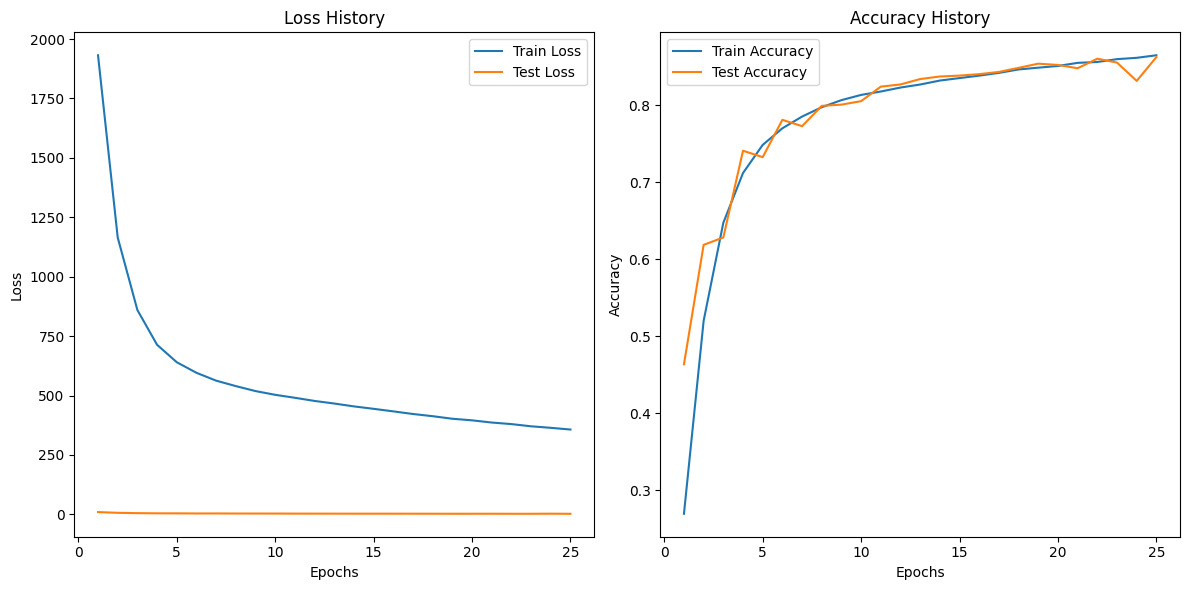

In [23]:
train_model([train_loader, test_loader], num_epochs=25, learning_rate=0.005)

In [24]:
print(f'Final test accuracy: {test_accuracies[-1]}')

Final test accuracy: 0.8624833333333334


## Visualization of the labels and predictions

In this section, you should visual one image from each class and show both the actual label and the predicted label for that image.

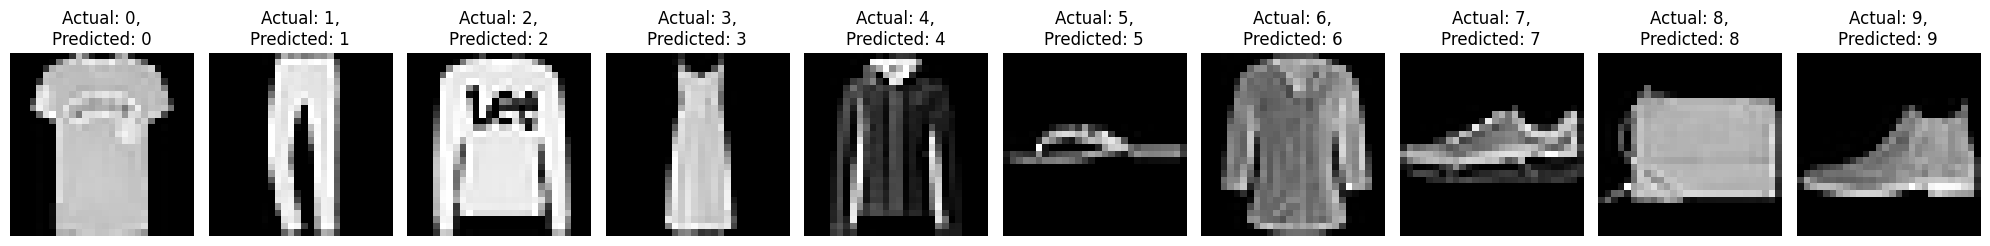

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define the simple neural network model parameters
def initialize_parameters(input_size, hidden_size, output_size):
    params = {
        'W1': np.random.randn(hidden_size, input_size),
        'b1': np.zeros((hidden_size, 1)),
        'W2': np.random.randn(output_size, hidden_size),
        'b2': np.zeros((output_size, 1))
    }
    return params

# Forward pass through the model
def model(x, params):
    z1 = np.dot(params['W1'], x) + params['b1']
    a1 = np.maximum(0, z1)  # ReLU activation
    z2 = np.dot(params['W2'], a1) + params['b2']
    return z2

# Define predict function
def predict(x, params):
    output = model(x, params)
    predicted_classes = np.argmax(output, axis=0)
    return predicted_classes

# Visualize one image from each class with actual and predicted labels
def visualize_predictions(parameters, test_loader, num_classes):
    class_indices = {i: [] for i in range(num_classes)}

    # Collect indices for each class
    for idx, (image, label) in enumerate(test_loader.dataset):
        if len(class_indices[label]) < 1:
            class_indices[label].append(idx)
        if all(len(class_indices[c]) > 0 for c in range(num_classes)):
            break

    fig, axs = plt.subplots(1, num_classes, figsize=(20, 20))

    for class_label, indices in class_indices.items():
        idx = indices[0]
        image, label = test_loader.dataset[idx]

        # Assuming image is a numpy array
        image = image.reshape(-1, 1)  # Reshape image
        predicted_label = predict(image, parameters)[0]

        axs[class_label].imshow(image.reshape(28, 28), cmap='gray')  # Assuming image size is 28x28
        axs[class_label].set_title(f'Actual: {label},\nPredicted: {predicted_label}', fontsize=12)
        axs[class_label].axis('off')

    plt.tight_layout()
    plt.show()

# Visualize predictions
# Assuming parameters, test_loader, and num_classes are defined elsewhere
initialize_parameters(28*28, 128, num_classes)  # Initialize network parameters
visualize_predictions(parameters, test_loader, num_classes)

